In [ ]:
!gdown https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp --output 101_ObjectCategories.tar.gz
!tar -xvf 101_ObjectCategories.tar.gz
!mv 101_ObjectCategories caltech101
!rm -rf caltech101/BACKGROUND_Google

Streaming output truncated to the last 5000 lines.
101_ObjectCategories/chair/image_0005.jpg
101_ObjectCategories/chair/image_0006.jpg
101_ObjectCategories/chair/image_0007.jpg
101_ObjectCategories/chair/image_0008.jpg
101_ObjectCategories/chair/image_0010.jpg
101_ObjectCategories/chair/image_0011.jpg
101_ObjectCategories/chair/image_0012.jpg
101_ObjectCategories/chair/image_0013.jpg
101_ObjectCategories/chair/image_0014.jpg
101_ObjectCategories/chair/image_0016.jpg
101_ObjectCategories/chair/image_0017.jpg
101_ObjectCategories/chair/image_0018.jpg
101_ObjectCategories/chair/image_0019.jpg
101_ObjectCategories/chair/image_0020.jpg
101_ObjectCategories/chair/image_0022.jpg
101_ObjectCategories/chair/image_0023.jpg
101_ObjectCategories/chair/image_0024.jpg
101_ObjectCategories/chair/image_0025.jpg
101_ObjectCategories/chair/image_0026.jpg
101_ObjectCategories/chair/image_0028.jpg
101_ObjectCategories/chair/image_0029.jpg
101_ObjectCategories/chair/image_0030.jpg
101_ObjectCategories/chai

In [ ]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras.backend as K

In [ ]:
img_inp = keras.layers.Input(shape=(224, 224, 3))
base_model = ResNet50(weights='imagenet', include_top=False)(img_inp)
output = keras.layers.GlobalAveragePooling2D()(base_model)
model = keras.Model(inputs=[img_inp], outputs=[output])

def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [ ]:
root_dir = '/content/caltech101'
filenames = sorted(get_file_list(root_dir))

In [ ]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
pickle.dump(feature_list, open('features-caltech101-resnet.pkl', 'wb'))
pickle.dump(filenames, open('filenames-caltech101.pkl','wb'))

In [ ]:
filenames = pickle.load(open('filenames-caltech101.pkl', 'rb'))
feature_list = pickle.load(open('features-caltech101-resnet.pkl', 'rb'))

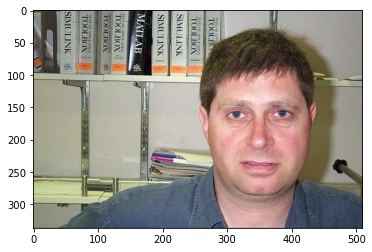

In [ ]:
%matplotlib inline  
plt.imshow(mpimg.imread(filenames[0]))

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute',
metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_list[0]])

In [ ]:
for i in range(5):
    print(distances[0][i])

4.9421562e-08
0.5446952
0.5500848
0.5502038
0.554221


In [ ]:
print(indices)

[[ 0 19 28  6 51]]


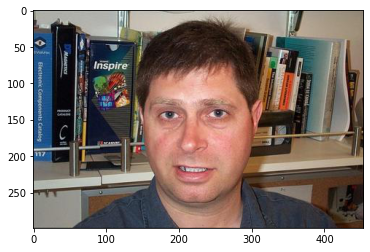

In [ ]:
plt.imshow(mpimg.imread(filenames[indices[0][1]]))

In [ ]:
import tensorflow as tf
import numpy as np

x = tf.constant([[1, 2, 3, 4],
                 [4, 5, 6, 7],
                 [7, 8, 9, 10]], tf.float32)


def initial_euclidean_matrix(input_tensor):
    tensor_shape = input_tensor.shape
    tensor_iter = input_tensor
    #print("INPUT TENSOR:", tensor_iter)
    euclidean_list = []
    #print("INPUT SHAPE:---", tensor_shape, "\n")
    for i in range(tensor_shape[0]):
        #print([1, tensor_shape[0]-1])
        split_head, split_tail = tf.split(tensor_iter, [1, tensor_shape[0]-1])
        #print("SPLITS:", split_head, split_tail)
        tensor_iter = tf.concat([split_tail, split_head], 0)
        #print("NEW TENSOR ITER:", tensor_iter)
        #print("SUB:---", input_tensor-tensor_iter)
        #print("SQU:---", tf.square(input_tensor-tensor_iter))
        #print("SUM:---", tf.reduce_sum(tf.square(input_tensor-tensor_iter), 1))
        euclidean_dist = (tf.sqrt(tf.reduce_sum(tf.square(input_tensor-tensor_iter), 1)))
        #print("EUCLIDEAN DIST:", euclidean_dist)
        #print(asdasd)
        #print(euclidean_dist)
        #ses.run(euclidean_dist)
        #euclidean_row = euclidean_dist.eval(session=ses)
        euclidean_list.append(euclidean_dist)
    #print("\nEUCLIDEAN LIST:----------\n", euclidean_list)
    #print("EUCLIDEAN IN:-------\n", np.asarray(euclidean_list))
    euclidean_out = np.asarray(euclidean_list).transpose([1, 0])
    #print("EUCLIDEAN OUT:-----------\n", euclidean_out)
    #print(asdasdsd)

    for i in range(tensor_shape[0]):
        """print(i)
        print(euclidean_out[i])
        print(euclidean_out[i][tensor_shape[0]-1-i:])
        print(euclidean_out[i][:tensor_shape[0]-1-i])
        print(np.append(euclidean_out[i][tensor_shape[0]-1-i:], 
                                     euclidean_out[i][:tensor_shape[0]-1-i]))"""
        euclidean_out[i] = np.append(euclidean_out[i][tensor_shape[0]-1-i:], 
                                     euclidean_out[i][:tensor_shape[0]-1-i])
        """print(euclidean_out[i])
        print("\nCHANGE:----:\n",euclidean_out)
        print(asasdsad)"""

    '''
    the return type is numpy.array, if need tenor for return, use the code beneath
    '''
    euclidean_out = tf.convert_to_tensor(euclidean_out)

    return euclidean_out

In [ ]:
features = tf.constant(feature_list)
features.shape

TensorShape([8677, 2048])

In [ ]:
iem = initial_euclidean_matrix(features)

In [ ]:
iem.shape

TensorShape([8677, 8677])

In [ ]:
tf.reduce_max(iem)

<tf.Tensor: shape=(), dtype=float32, numpy=1.3597314>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[0.26666668 0.2509804  0.20392157]
  [0.24313726 0.23137255 0.19607843]
  [0.23529412 0.23529412 0.20392157]
  ...
  [0.45490196 0.4509804  0.43529412]
  [0.45490196 0.4509804  0.43529412]
  [0.49411765 0.49019608 0.4745098 ]]

 [[0.36862746 0.3529412  0.30980393]
  [0.32941177 0.31764707 0.28235295]
  [0.30980393 0.30980393 0.2784314 ]
  ...
  [0.58431375 0.5803922  0.5647059 ]
  [0.58431375 0.5803922  0.5647059 ]
  [0.6117647  0.60784316 0.5921569 ]]

 [[0.3529412  0.3372549  0.3019608 ]
  [0.34509805 0.33333334 0.30588236]
  [0.33333334 0.3372549  0.3137255 ]
  ...
  [0.57254905 0.5686275  0.5529412 ]
  [0.57254905 0.5686275  0.5529412 ]
  [0.5921569  0.5882353  0.57254905]]

 ...

 [[0.5529412  0.56078434 0.5058824 ]
  [0.5137255  0.52156866 0.46666667]
  [0.5254902  0.53333336 0.47843137]
  ...
  [0.20784314 0.2627451  0.36862746]
  [0.21176471 0.26666668 0.36862746]
  [0.23529412 0.29411766 0.3764706 ]]

 [[0.5529412  0.56078434 0.5058824 ]
  [0.5137255  0.52156866 0.46666667]


NameError: ignored

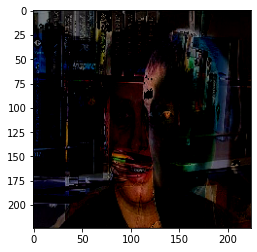

In [ ]:
input_shape = (224, 224, 3)
query_img = image.load_img(filenames[0], target_size=(
    input_shape[0], input_shape[1]))
query_img_array = image.img_to_array(query_img)
gray_img = tf.image.rgb_to_grayscale(query_img_array)
gray_img = tf.reshape(gray_img, [224, 224])
plt.imshow(gray_img)
print(query_img_array/255)

ans_img_1 = image.load_img(filenames[19], target_size=(
    input_shape[0], input_shape[1]))
ans_1_img_array = image.img_to_array(ans_img_1)
gray_img_1 = tf.image.rgb_to_grayscale(ans_1_img_array)
gray_img_1 = tf.reshape(gray_img_1, [224, 224])
plt.imshow(gray_img_1)
print(ans_1_img_array/255)


mask = K.abs(gray_img/255 - gray_img_1/255) < 0.5
print(mask)
mask = np.int32(mask)
mask = tf.reshape(mask, (224, 224, 1))
plt.imshow((ans_1_img_array - query_img_array)*mask)
print(sadadsad)

print("\nDIFFERENCE:______________________\n",ans_1_img_array/255 - query_img_array/255)

ans_2_img = image.load_img(filenames[28], target_size=(
    input_shape[0], input_shape[1]))
ans_2_img_array = image.img_to_array(ans_2_img)
print(ans_2_img_array/255)

In [ ]:
def iou(img_path_1, img_path_2, diff_range=0.05, smooth = 100):
    input_shape = (224, 224, 3)
    img_1 = image.load_img(img_path_1, target_size=(
        input_shape[0], input_shape[1]))
    img_2 = image.load_img(img_path_2, target_size=(
        input_shape[0], input_shape[1])))
    img_array_1 = image.img_to_array(img_1)
    img_array_2 = image.img_to_array(img_2)
    gray_1, gray_2 = tf.keras.rgb_to_grayscale([img_array_1, img_array_2])
    #intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    diff_mask = K.abs(gray_1/255 - gray_2/255) < diff_range
    mask = np.int32(mask)
    mask = tf.reshape(mask, (224, 224, 1))
    intersection = K.sum(mask, axis=-1)
    sum_ = K.sum(K.square(), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

## Performing Feature Extraction on Melanoma dataset:

In [21]:
"""
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil >> /dev/null
!pip install psutil >> /dev/null
!pip install humanize >> /dev/null
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
try:
    gpu = GPUs[0]
    def printm():
        process = psutil.Process(os.getpid())
        print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
        print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
    printm()
except IndexError:
    print("No GPU present!!!")

from google.colab import drive
drive.mount('/content/drive')

!pip install kaggle >> /dev/null
!pip install -q efficientnet >> /dev/null
!pip install tensorflow-addons tensorflow-hub >> /dev/null

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/"

import sys
sys.path.insert(0, '/content/drive/My Drive/Meldetect/Meldetect_libraries')
"""

import sys
sys.path.insert(0, '/home/priyam145/MelDetect/libraries')

import pandas as pd, numpy as np
import tensorflow as tf, re, math
from tensorflow import keras
import tensorflow.keras.backend as K
import efficientnet.tfkeras as efn
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2
import pickle


import config

config.DEVICE = "TPU" #or "GPU"

# USE DIFFERENT SEED FOR DIFFERENT STRATIFIED KFOLD
config.SEED = 42

# NUMBER OF FOLDS. USE 3, 5, OR 15 
config.FOLDS = 3

# WHICH IMAGE SIZES TO LOAD EACH FOLD
# CHOOSE 128, 192, 256, 384, 512, 768 
config.IMG_SIZES = [384,384,384]

# INCLUDE OLD COMP DATA? YES=1 NO=0
config.INC2019 = [0,0,0]
config.INC2018 = [1,1,1]

# BATCH SIZE AND EPOCHS
config.BATCH_SIZES = [32]*config.FOLDS
config.EPOCHS = [15]*config.FOLDS

# WEIGHTS FOR FOLD MODELS WHEN PREDICTING TEST
config.WGTS = [1/config.FOLDS]*config.FOLDS

# TEST TIME AUGMENTATION STEPS
config.TTA = 11

# WHETHER TO INCLUDE METADATA OR NOT
config.IMG_ONLY = True

config.REPLICAS, config.AUTO, config.strategy = config.tpu_gpu_initializer(DEVICE="TPU")

config.DATA_PATH = ['gs://kds-e587a221f0797cf8f017657b99d05aee1f262e04db020e07144fa268',
                    'gs://kds-e587a221f0797cf8f017657b99d05aee1f262e04db020e07144fa268',
                    'gs://kds-e587a221f0797cf8f017657b99d05aee1f262e04db020e07144fa268']


config.DATA_PATH2 = ['gs://kds-daa129e989ec157e205de7addb63ac52a6bb066eb3efea7e285641dd',
                    'gs://kds-daa129e989ec157e205de7addb63ac52a6bb066eb3efea7e285641dd',
                    'gs://kds-daa129e989ec157e205de7addb63ac52a6bb066eb3efea7e285641dd']

import models
import datasets
import images
import callbacks
import train
from custom_losses_metrics import jaccard_distance, iou, dice_coe, precision, recall, accuracy

images.ROT_ = 180.0
images.SHR_ = 2.0
images.HZOOM_ = 8.0
images.WZOOM_ = 8.0
images.HSHIFT_ = 8.0
images.WSHIFT_ = 8.0

No GPU present!!!
Mounted at /content/drive
connecting to TPU...
Could not connect to TPU
Using default strategy for CPU and single GPU
Num GPUs Available:  0
REPLICAS: 1


In [22]:
ROOT_DIR = "/home/priyam145/MelDetect"

### Extracting Feature Vectors of Melanoma Datasets:

In [5]:
skf = KFold(n_splits=config.FOLDS,shuffle=True,random_state=config.SEED)
which_fold = 2

for fold,(idxT,idxV) in enumerate(skf.split(np.arange(15))):
    if fold != which_fold:
        continue
    data_index = fold
    data_train = idxT
    data_valid = idxV

files_train, files_valid, files_test = datasets.get_files_path(data_index,
                                                               data_train,
                                                               data_valid)

#### Using 2018+2017 external data


In [6]:
train_dataset = datasets.get_dataset(files_train, augment=False, shuffle=False,
                                     repeat=False, dim=config.IMG_SIZES[data_index],
                                     batch_size=config.BATCH_SIZES[data_index])
valid_dataset = datasets.get_dataset(files_valid, augment=False, shuffle=False,
                                     repeat=False, dim=config.IMG_SIZES[data_index],
                                     batch_size=config.BATCH_SIZES[data_index])
test_dataset = datasets.get_dataset(files_test, labeled=False, augment=False, shuffle=False,
                                     repeat=False, dim=config.IMG_SIZES[data_index],
                                     batch_size=config.BATCH_SIZES[data_index])

In [7]:
model_name = "efficientnet_b6"
_, featext_model = models.build_model(model_name, dim=config.IMG_SIZES[data_index],
                                      return_feature_model=True, image_only=config.IMG_ONLY)
featext_model.load_weights(os.path.join(ROOT_DIR, "Models", f"feat_{model_name}.h5")

165527552/165527152 [==============================] - 3s 0us/step


In [ ]:
"""
# TRAIN DATASET
feat_vectors = featext_model.predict(train_dataset)
print(feat_vectors.shape)
pickle.dump(feat_vectors, open(os.path.join(ROOT_DIR,
                                            f'{model_name}_feat_vecs.pkl'), 'wb'))


# VALID DATASET
feat_vectors_valid = featext_model.predict(valid_dataset)
print(feat_vectors_valid.shape)
pickle.dump(feat_vectors_valid, open(os.path.join(ROOT_DIR,
                                            f'{model_name}_feat_vecs_valid.pkl'), 'wb'))


# TEST DATASET
feat_vectors_test = featext_model.predict(test_dataset)
print(feat_vectors_test.shape)
pickle.dump(feat_vectors_test, open(os.path.join(ROOT_DIR,
                                            f'{model_name}_feat_vecs_test.pkl'), 'wb'))
                                            
"""

"""
# TRAIN + VALID
feat_vecs = pickle.load
feat_vecs_tv = tf.concat([feat_vectors,
                          feat_vectors_valid],0)
print(feat_vecs_tv.shape)
pickle.dump(feat_vecs_tv, open(os.path.join(ROOT_DIR,
                                            f"{model_name}_feat_vecs_tv.pkl"), "wb"))


# COMPLETE DATASET (including TEST)
feat_vecs_full_data = tf.concat([feat_vectors,
                                 feat_vectors_valid,
                                 feat_vectors_test], axis=0)
print(feat_vecs_full_data.shape)
pickle.dump(feat_vecs_full_data, open(os.path.join(ROOT_DIR,
                                            f"{model_name}_feat_vecs_full_data.pkl"), "wb"))
"""


BATCHS = 300

for data_type, dataset in (("train",train_dataset), ("valid",valid_dataset), ("test", test_dataset)):
    feat_vectors = featext_model.predict(dataset.take(BATCHS))
    print(feat_vectors.shape)
    pickle.dump(feat_vectors, open(os.path.join(ROOT_DIR,
                                                f"{model_name}_feat_vecs_{data_type}_1.pkl"), "wb"))

In [13]:
LOG_DIR = ROOT_DIR + '/embedding-tensorboard/log-1'
os.makedirs(LOG_DIR, exist_ok=True)

for data_type, dataset in (("train",train_dataset), ("valid",valid_dataset)):
    metadata = os.path.join(LOG_DIR, f'metadata_{data_type}.tsv')
    with open(metadata, 'w') as metadata_file:
        for item in dataset.take(BATCHS):
            x, y = item
            #metadata = x["metadata_input"]
            for i in range(x["img_input"].shape[0]):
                metadata_file.write('{}\n'.format(tf.cast(y[i], tf.int8)))

metadata = os.path.join(LOG_DIR, 'metadata_tv.tsv')
with open(metadata, "w") as metadata_file:
    for item in train_dataset.take(BATCHS):
        x, y = item
        #metadata = x["metadata_input"]
        for i in range(x["img_input"].shape[0]):
            metadata_file.write('{}\n'.format(tf.cast(y[i], tf.int8)))

with open(metadata, "a") as metadata_file:
    for item in valid_dataset.take(BATCHS):
        x, y = item
        #metadata = x["metadata_input"]
        for i in range(x["img_input"].shape[0]):
            metadata_file.write('{}\n'.format(tf.cast(y[i], tf.int8)))

In [26]:
feat_vectors = None

## Training Image Segmentation Model:

In [23]:
!kaggle datasets download -d mnowak061/isic2018-and-ph2-384x384-jpg
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/images/images/ISIC_0000480.jpg  
  inflating: train/images/images/ISIC_0000481.jpg  
  inflating: train/images/images/ISIC_0000482.jpg  
  inflating: train/images/images/ISIC_0000483.jpg  
  inflating: train/images/images/ISIC_0000484.jpg  
  inflating: train/images/images/ISIC_0000485.jpg  
  inflating: train/images/images/ISIC_0000486.jpg  
  inflating: train/images/images/ISIC_0000487.jpg  
  inflating: train/images/images/ISIC_0000488.jpg  
  inflating: train/images/images/ISIC_0000489.jpg  
  inflating: train/images/images/ISIC_0000490.jpg  
  inflating: train/images/images/ISIC_0000491.jpg  
  inflating: train/images/images/ISIC_0000492.jpg  
  inflating: train/images/images/ISIC_0000493.jpg  
  inflating: train/images/images/ISIC_0000494.jpg  
  inflating: train/images/images/ISIC_0000495.jpg  
  inflating: train/images/images/ISIC_0000496.jpg  
  inflating: train/images/images/ISIC_0000498.jpg  
  inflating: 

In [24]:
datasets.create_seg_tfrecords("train")
datasets.create_seg_tfrecords("test", SIZE=300)


Creating train_0.tfrec......
0 , 100 , 200 , 300 , 400 , 
Creating train_1.tfrec......
0 , 100 , 200 , 300 , 400 , 
Creating train_2.tfrec......
0 , 100 , 200 , 300 , 400 , 
Creating train_3.tfrec......
0 , 100 , 200 , 300 , 400 , 
Creating train_4.tfrec......
0 , 100 , 200 , 300 , 400 , 
Creating train_5.tfrec......
0 , 100 , 200 , 
Creating test_0.tfrec......
0 , 100 , 200 , 
Creating test_1.tfrec......
0 , 100 , 200 , 

In [3]:
train_paths_segs, test_paths_segs = datasets.get_seg_paths("tfrecords")
valid_paths_segs = train_paths_segs[-1]
train_paths_segs = train_paths_segs[:-1]

train_dataset_seg = datasets.get_seg_dataset(train_paths_segs)
valid_dataset_seg = datasets.get_seg_dataset(valid_paths_segs)
test_dataset_seg = datasets.get_seg_dataset(test_paths_segs, labeled=False)

In [ ]:
DIM = 384 

input_layer = keras.layers.Input(shape=(DIM, DIM, 3))
unet_model = models.get_unet(input_layer)

unet_model.compile(optimizer=keras.optimizers.Nadam(lr=0.003),
                   loss=[jaccard_distance],
                   metrics=[iou, dice_coe, precision, recall, accuracy])
                   
unet_model.summary()
history = unet_model.fit(
    train_dataset_seg,
    epochs=100,
    validation_data=valid_dataset_seg,
    callbacks=[keras.callbacks.ModelCheckpoint("unet.h5", monitor='val_loss',
                                               verbose=2, save_best_only=True,
                                               save_weights_only=True, mode='min',
                                               save_freq='epoch')],
    verbose=2,
)
root_dir = "/content/drive/MyDrive/Meldetect/UnetModel"
os.makedirs(root_dir, exist_ok=True)
unet_model.save_weights(os.path.join(root_dir, "unet_weights.h5"))

In [18]:
unet_model.load_weights("/content/unet.h5")

In [25]:
train_dataset_seg = None
valid_dataset_seg = None
test_dataset_seg = None

In [21]:
!rm -rf train
!rm -rf test
!rm \*.zip

### Predicting masks of melanoma dataset:

In [11]:
DIM = 384 

input_layer = keras.layers.Input(shape=(DIM, DIM, 3))
unet_model = models.get_unet(input_layer)

#unet_weight_dir = "/content/drive/MyDrive/Meldetect/UnetModel"
unet_model.load_weights(os.path.join(ROOT_DIR, "Models", "unet.h5"))

In [23]:
AUTO = tf.data.experimental.AUTOTUNE
seg_train_dataset = train_dataset.map(lambda features, target: (features["img_input"],
                                                                target),
                                      num_parallel_calls=AUTO)
seg_valid_dataset = valid_dataset.map(lambda features, target: (features["img_input"], 
                                                                target), 
                                      num_parallel_calls=AUTO)
seg_test_dataset = test_dataset.map(lambda features, img_names_or_0: (features["img_input"],
                                                                      img_names_or_0),
                                    num_parallel_calls=AUTO)

In [ ]:
#train_masks = unet_model.predict(seg_train_dataset.take(BATCHS))
#valid_masks = unet_model.predict(seg_valid_dataset.take(BATCHS))
#test_masks = unet_model.predict(seg_test_dataset.take(BATCHS))

for data_type, dataset in (("train",seg_train_dataset), ("valid",seg_valid_dataset), ("test", seg_test_dataset)):
    masks = unet_model.predict(dataset.take(BATCHS))
    print(masks.shape)
    pickle.dump(masks, open(os.path.join(ROOT_DIR,
                                         f"{model_name}_masks_{data_type}.pkl"),
                            "wb")
    )

## Calculating Euclidean Distance Matrix:

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
demo = tf.constant([[1, 2, 3, 4],
                    [4, 5, 6, 7],
                    [7, 8, 9, 10]], tf.float32)


def initial_euclidean_matrix(input_tensor):
    tensor_shape = input_tensor.shape
    tensor_iter = input_tensor
    #print("INPUT TENSOR:", tensor_iter)
    euclidean_list = []
    #print("INPUT SHAPE:---", tensor_shape, "\n")
    for i in range(tensor_shape[0]):
        #print([1, tensor_shape[0]-1])
        split_head, split_tail = tf.split(tensor_iter, [1, tensor_shape[0]-1])
        #print("SPLITS:", split_head, split_tail)
        tensor_iter = tf.concat([split_tail, split_head], 0)
        #print("NEW TENSOR ITER:", tensor_iter)
        #print("SUB:---", input_tensor-tensor_iter)
        #print("SQU:---", tf.square(input_tensor-tensor_iter))
        #print("SUM:---", tf.reduce_sum(tf.square(input_tensor-tensor_iter), 1))
        euclidean_dist = (tf.sqrt(tf.reduce_sum(tf.square(input_tensor-tensor_iter), 1)))
        #print("EUCLIDEAN DIST:", euclidean_dist)
        #print(asdasd)
        #print(euclidean_dist)
        #ses.run(euclidean_dist)
        #euclidean_row = euclidean_dist.eval(session=ses)
        euclidean_list.append(euclidean_dist)
    #print("\nEUCLIDEAN LIST:----------\n", euclidean_list)
    #print("EUCLIDEAN IN:-------\n", np.asarray(euclidean_list))
    euclidean_out = np.asarray(euclidean_list).transpose([1, 0])
    #print("EUCLIDEAN OUT:-----------\n", euclidean_out)
    #print(asdasdsd)

    for i in range(tensor_shape[0]):
        """print(i)
        print(euclidean_out[i])
        print(euclidean_out[i][tensor_shape[0]-1-i:])
        print(euclidean_out[i][:tensor_shape[0]-1-i])
        print(np.append(euclidean_out[i][tensor_shape[0]-1-i:], 
                                     euclidean_out[i][:tensor_shape[0]-1-i]))"""
        euclidean_out[i] = np.append(euclidean_out[i][tensor_shape[0]-1-i:], 
                                     euclidean_out[i][:tensor_shape[0]-1-i])
        """print(euclidean_out[i])
        print("\nCHANGE:----:\n",euclidean_out)
        print(asasdsad)"""

    '''
    the return type is numpy.array, if need tenor for return, use the code beneath
    '''
    euclidean_out = tf.convert_to_tensor(euclidean_out)

    return euclidean_out

initial_euclidean_matrix(demo)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.,  6., 12.],
       [ 6.,  0.,  6.],
       [12.,  6.,  0.]], dtype=float32)>

In [4]:
for item in train_dataset_seg.take(1):
    images, masks = item

print(masks.shape)
masks_1 = masks[0]
masks_2 = masks[1:]

(32, 384, 384, 3)


In [13]:
images.shape

TensorShape([32, 384, 384, 3])

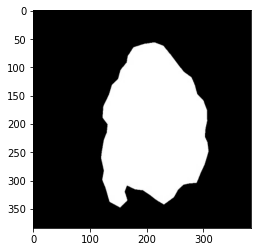

In [15]:
plt.imshow(masks_1)

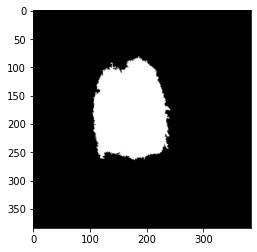

In [16]:
plt.imshow(masks_2[0])

In [17]:
images[0].shape

TensorShape([384, 384, 3])

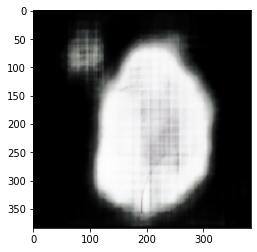

In [20]:
pred = unet_model.predict(tf.expand_dims(images[0], axis=0))
plt.imshow(pred[0])

AxesImage(54,36;334.8x217.44)


<tf.Tensor: shape=(384, 384), dtype=float32, numpy=
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

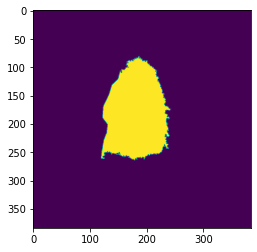

In [9]:
#euclidean_dist = (tf.sqrt(tf.reduce_sum(tf.square(input_tensor-tensor_iter), 1)))

def my_iou(img_1, img_2, smooth = 100):
    #print(K.abs(img_1 * img_2))
    intersection = K.sum(K.abs(img_1 * img_2), axis=-1)
    print(plt.imshow(intersection))
    sum_ = K.sum(K.square(img_1), axis = -1) + K.sum(K.square(img_2), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

#def initial_iou_matrix(input_image, masked_images):
    
my_iou(masks_1, masks_2[0])